In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, os, csv, io, re, datetime
import seaborn as sns
from pop_stats import calc_pop_stats, calc_growth, calc_growth_mult 
%matplotlib inline

In [320]:
pickle_path = '/home/dhense/PublicData/Economic_analysis/intermediate_files/'

u6rate_pickle = 'u6rate.pickle'
urate_all_pickle = 'urate_all.pickle'
state_pop_pickle = 'state_pop.pickle'
percentage_pickle = 'percentage.pickle'

print("...loading pickle")
tmp = open(pickle_path+u6rate_pickle,'rb')
df_urates = pickle.load(tmp)
tmp.close()

print("...loading pickle")
tmp = open(pickle_path+'urate/'+urate_all_pickle,'rb')
df_urate = pickle.load(tmp)
tmp.close()

print("...loading pickle")
tmp = open(pickle_path+state_pop_pickle,'rb')
df_state = pickle.load(tmp)
tmp.close()

print("...loading pickle")
tmp = open(pickle_path+percentage_pickle,'rb')
df_perc = pickle.load(tmp)
tmp.close()

df_perc = df_perc[(df_perc.Year>1998)&(df_perc.Year<2019)]

...loading pickle
...loading pickle
...loading pickle
...loading pickle


In [321]:
df_stats = df_state.groupby(['Age_group','Sex','Hispanic','Race']).sum().reset_index()
df_stats

,Age_group,Sex,Hispanic,Race,POPESTIMATE1990,POPESTIMATE1991,POPESTIMATE1992,POPESTIMATE1993,POPESTIMATE1994,POPESTIMATE1995,...,POPESTIMATE2009,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,1,Female,Hispanic,Black Only,51646,51365,52491,54327,56106,58282,...,67226,90052,88532,87221,87496,88262,89800,92705,95096,97200
1,1,Female,Hispanic,Other,32435,31696,31882,32920,34409,36171,...,71390,134783,135303,135919,137583,139359,142020,145983,149474,152929
2,1,Female,Hispanic,White Only,898102,917446,955808,999884,1047334,1098057,...,1416110,1530777,1549219,1553431,1562094,1573461,1593886,1630307,1665287,1694516
3,1,Female,Not Hispanic,Black Only,1291383,1264130,1266110,1279298,1313281,1357261,...,1311858,1331405,1296295,1252889,1216341,1188208,1173113,1179437,1178556,1167616
4,1,Female,Not Hispanic,Other,361499,363005,369709,380548,395058,415099,...,593437,704490,708333,717870,732009,746938,760812,780570,799007,813007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,15,Male,Hispanic,Other,719,719,714,730,725,732,...,2831,3628,3950,4233,4562,4998,5404,5836,6225,6625
176,15,Male,Hispanic,White Only,30467,31991,33468,34922,36116,37515,...,108337,90531,99570,109048,118857,129129,140248,150716,160454,169369
177,15,Male,Not Hispanic,Black Only,65691,68013,70385,72430,74177,76847,...,95047,107203,112986,119174,123855,129064,135035,139983,145053,150990
178,15,Male,Not Hispanic,Other,14163,15446,16842,18182,19595,21075,...,74159,67146,72928,79639,86313,93582,101882,109741,118135,127202


In [322]:
def total_growth(df_stats):
    total = df_stats[['POPESTIMATE1990','POPESTIMATE1991','POPESTIMATE1992','POPESTIMATE1993','POPESTIMATE1994','POPESTIMATE1995','POPESTIMATE1996','POPESTIMATE1997','POPESTIMATE1998','POPESTIMATE1999','POPESTIMATE2000','POPESTIMATE2001','POPESTIMATE2002','POPESTIMATE2003','POPESTIMATE2004','POPESTIMATE2005','POPESTIMATE2006','POPESTIMATE2007','POPESTIMATE2008','POPESTIMATE2009','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']].sum()

    growth = [((total['POPESTIMATE'+str(y)]/total['POPESTIMATE'+str(y-1)])-1)*100 for y in range(1991,2019)]

    return growth

def calc_growth(df_stats,column,value):
    aggs = df_stats[df_stats[column]==value][['POPESTIMATE1990','POPESTIMATE1991','POPESTIMATE1992','POPESTIMATE1993','POPESTIMATE1994','POPESTIMATE1995','POPESTIMATE1996','POPESTIMATE1997','POPESTIMATE1998','POPESTIMATE1999','POPESTIMATE2000','POPESTIMATE2001','POPESTIMATE2002','POPESTIMATE2003','POPESTIMATE2004','POPESTIMATE2005','POPESTIMATE2006','POPESTIMATE2007','POPESTIMATE2008','POPESTIMATE2009','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']].sum()

    growth = [((aggs['POPESTIMATE'+str(y)]/aggs['POPESTIMATE'+str(y-1)])-1)*100 for y in range(1991,2019)]

    return growth

def calc_growth_mult(df_stats,column1,value1,column2,value2):
    aggs = df_stats[(df_stats[column1]==value1)&(df_stats[column2]==value2)][['POPESTIMATE1990','POPESTIMATE1991','POPESTIMATE1992','POPESTIMATE1993','POPESTIMATE1994','POPESTIMATE1995','POPESTIMATE1996','POPESTIMATE1997','POPESTIMATE1998','POPESTIMATE1999','POPESTIMATE2000','POPESTIMATE2001','POPESTIMATE2002','POPESTIMATE2003','POPESTIMATE2004','POPESTIMATE2005','POPESTIMATE2006','POPESTIMATE2007','POPESTIMATE2008','POPESTIMATE2009','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']].sum()

    growth = [((aggs['POPESTIMATE'+str(y)]/aggs['POPESTIMATE'+str(y-1)])-1)*100 for y in range(1991,2019)]

    return growth

def calc_growth_age(df_stats,value):
    aggs = df_stats[df_stats['Age_group'].isin(value)][['POPESTIMATE1990','POPESTIMATE1991','POPESTIMATE1992','POPESTIMATE1993','POPESTIMATE1994','POPESTIMATE1995','POPESTIMATE1996','POPESTIMATE1997','POPESTIMATE1998','POPESTIMATE1999','POPESTIMATE2000','POPESTIMATE2001','POPESTIMATE2002','POPESTIMATE2003','POPESTIMATE2004','POPESTIMATE2005','POPESTIMATE2006','POPESTIMATE2007','POPESTIMATE2008','POPESTIMATE2009','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']].sum()

    growth = [((aggs['POPESTIMATE'+str(y)]/aggs['POPESTIMATE'+str(y-1)])-1)*100 for y in range(1991,2019)]

    return growth

df_pop_stats = pd.DataFrame()
df_pop_stats['Year'] = [i for i in range(1991,2019)]
df_pop_stats['Total_Growth'] = total_growth(df_stats)
df_pop_stats['Female_Growth'] = calc_growth(df_stats,'Sex','Female')
df_pop_stats['Male_Growth'] = calc_growth(df_stats,'Sex','Male')
df_pop_stats['White_Growth'] = calc_growth(df_stats,'Race','White Only')
df_pop_stats['Black_Growth'] = calc_growth(df_stats,'Race','Black Only')
df_pop_stats['Hispanic_Growth'] = calc_growth(df_stats,'Hispanic','Hispanic')
df_pop_stats['White_Male_Growth'] = calc_growth_mult(df_stats,'Sex','Male','Race','White Only')
df_pop_stats['White_Female_Growth'] = calc_growth_mult(df_stats,'Sex','Female','Race','White Only')
df_pop_stats['Black_Male_Growth'] = calc_growth_mult(df_stats,'Sex','Male','Race','Black Only')
df_pop_stats['Black_Female_Growth'] = calc_growth_mult(df_stats,'Sex','Female','Race','Black Only')
df_pop_stats['Hispanic_Male_Growth'] = calc_growth_mult(df_stats,'Sex','Male','Hispanic','Hispanic')
df_pop_stats['Hispanic_Female_Growth'] = calc_growth_mult(df_stats,'Sex','Female','Hispanic','Hispanic')
df_pop_stats['16-29_Growth'] = calc_growth_age(df_stats,[1,2,3])
df_pop_stats['30-44_Growth'] = calc_growth_age(df_stats,[4,5,6])
df_pop_stats['45-64_Growth'] = calc_growth_age(df_stats,[7,8,9,10])
df_pop_stats['65+_Growth'] = calc_growth_age(df_stats,[11,12,13,14,15])

df_pop_stats

,Year,Total_Growth,Female_Growth,Male_Growth,White_Growth,Black_Growth,Hispanic_Growth,White_Male_Growth,White_Female_Growth,Black_Male_Growth,Black_Female_Growth,Hispanic_Male_Growth,Hispanic_Female_Growth,16-29_Growth,30-44_Growth,45-64_Growth,65+_Growth
0,1991,1.155675,1.104033,1.211433,0.907697,1.709075,4.139457,0.984143,0.836185,1.678554,1.735188,4.278444,3.995242,-1.325081,3.195340,1.204088,1.806061
1,1992,1.301487,1.201643,1.409173,1.028887,2.001721,4.268514,1.149704,0.915702,2.130319,1.891759,4.364593,4.168551,-0.854956,1.363543,3.584182,1.711230
2,1993,1.254379,1.203285,1.309374,0.997265,1.831358,4.552916,1.074727,0.924527,1.844614,1.819996,4.593425,4.510690,-0.709890,1.639755,2.773967,1.686912
3,1994,1.233121,1.176572,1.293923,0.987581,1.873120,4.443965,1.071141,0.909000,1.891127,1.857684,4.543313,4.340324,-0.462090,1.439170,2.845077,1.303855
4,1995,1.307050,1.229154,1.390707,1.055768,1.929623,4.554532,1.161209,0.956453,1.984686,1.882403,4.720220,4.381347,0.146984,1.046595,2.900620,1.315603
5,1996,1.290201,1.220112,1.365356,1.034018,1.854571,4.787005,1.129006,0.944367,1.898227,1.817095,4.899892,4.668626,0.544409,0.635302,3.010762,1.106760
6,1997,1.361786,1.284167,1.444895,1.099537,1.952458,4.983778,1.203698,1.001048,2.024576,1.890500,5.121328,4.839219,0.963383,0.271633,3.469148,0.757144
7,1998,1.317734,1.233359,1.407933,1.062108,1.865099,4.979183,1.169369,0.960484,1.950704,1.791458,5.125951,4.824520,1.055245,0.040935,3.493433,0.632524
8,1999,1.252984,1.146259,1.366880,0.983538,1.754057,4.845649,1.094610,0.878087,1.848994,1.672259,5.064769,4.614079,0.762161,-0.032261,3.627972,0.516136
9,2000,-0.581583,-0.592546,-0.569910,-1.440188,-2.299486,2.594098,-1.415099,-1.464059,-2.396708,-2.215575,2.830091,2.343621,-6.206239,0.029158,3.389940,0.792759


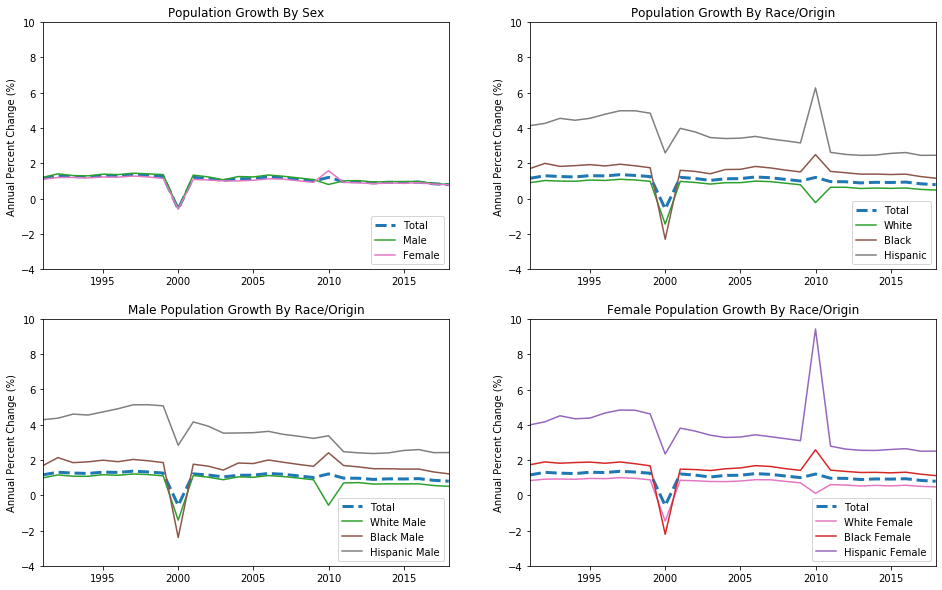

In [323]:
fig, axs = plt.subplots(2, 2,figsize=(16,10))
axs[0, 0].plot(df_pop_stats['Year'],df_pop_stats['Total_Growth'], 'tab:blue',lw=3,linestyle='--')
axs[0, 0].plot(df_pop_stats['Year'],df_pop_stats['Male_Growth'], 'tab:green')
axs[0, 0].plot(df_pop_stats['Year'],df_pop_stats['Female_Growth'], 'tab:pink')
axs[0, 0].set_title('Population Growth By Sex')
axs[0, 0].legend(['Total','Male','Female'],loc='lower right')
axs[0, 1].plot(df_pop_stats['Year'],df_pop_stats['Total_Growth'], 'tab:blue',lw=3,linestyle='--')
axs[0, 1].plot(df_pop_stats['Year'],df_pop_stats['White_Growth'], 'tab:green')
axs[0, 1].plot(df_pop_stats['Year'],df_pop_stats['Black_Growth'], 'tab:brown')
axs[0, 1].plot(df_pop_stats['Year'],df_pop_stats['Hispanic_Growth'], 'tab:grey')
axs[0, 1].set_title('Population Growth By Race/Origin')
axs[0, 1].legend(['Total','White','Black','Hispanic'],loc='lower right')
axs[1, 0].plot(df_pop_stats['Year'],df_pop_stats['Total_Growth'], 'tab:blue',lw=3,linestyle='--')
axs[1, 0].plot(df_pop_stats['Year'],df_pop_stats['White_Male_Growth'], 'tab:green')
axs[1, 0].plot(df_pop_stats['Year'],df_pop_stats['Black_Male_Growth'], 'tab:brown')
axs[1, 0].plot(df_pop_stats['Year'],df_pop_stats['Hispanic_Male_Growth'], 'tab:grey')
axs[1, 0].set_title('Male Population Growth By Race/Origin')
axs[1, 0].legend(['Total','White Male','Black Male','Hispanic Male'],loc='lower right')
axs[1, 1].plot(df_pop_stats['Year'],df_pop_stats['Total_Growth'], 'tab:blue',lw=3,linestyle='--')
axs[1, 1].plot(df_pop_stats['Year'],df_pop_stats['White_Female_Growth'], 'tab:pink')
axs[1, 1].plot(df_pop_stats['Year'],df_pop_stats['Black_Female_Growth'], 'tab:red')
axs[1, 1].plot(df_pop_stats['Year'],df_pop_stats['Hispanic_Female_Growth'], 'tab:purple')
axs[1, 1].set_title('Female Population Growth By Race/Origin')
axs[1, 1].legend(['Total','White Female','Black Female','Hispanic Female'],loc='lower right')


for ax in axs.flat:
    ax.set(ylabel='Annual Percent Change (%)')
    ax.margins(x=0)
    ax.set_yticks(np.arange(-4,12,2))
    


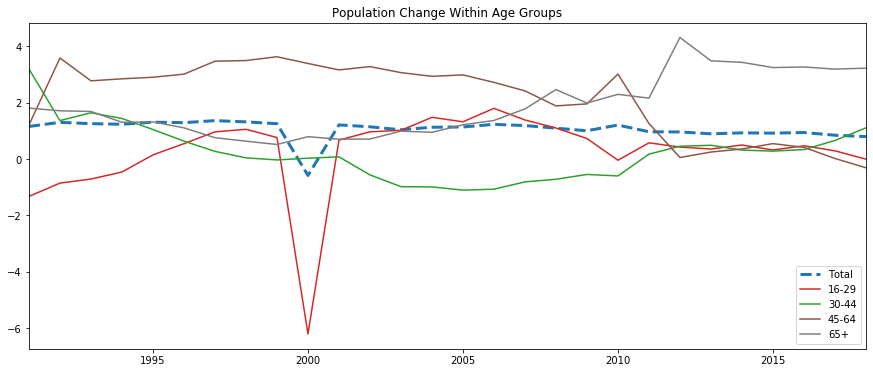

In [324]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_pop_stats['Year'],df_pop_stats['Total_Growth'], 'tab:blue',lw=3,linestyle='--')
ax.plot(df_pop_stats['Year'],df_pop_stats['16-29_Growth'], 'tab:red')
ax.plot(df_pop_stats['Year'],df_pop_stats['30-44_Growth'], 'tab:green')
ax.plot(df_pop_stats['Year'],df_pop_stats['45-64_Growth'], 'tab:brown')
ax.plot(df_pop_stats['Year'],df_pop_stats['65+_Growth'], 'tab:grey')
ax.set_title('Population Change Within Age Groups')
ax.legend(['Total','16-29','30-44','45-64','65+'],loc='lower right')
ax.margins(x=0)

In [325]:
df_perc2018 = df_perc[df_perc.Year==2018].groupby('Year')['perc_nilf', 'perc_retired_nilf', 'perc_disabled_nilf', 'perc_student_nilf', 'perc_unemployed', 'perc_looking', 'perc_layoff', 'perc_employed', 'perc_employed_ft', 'perc_employed_pt', 'perc_employed_ft_student', 'perc_employed_pt_student'].mean().reset_index()
df_perc2018

,Year,perc_nilf,perc_retired_nilf,perc_disabled_nilf,perc_student_nilf,perc_unemployed,perc_looking,perc_layoff,perc_employed,perc_employed_ft,perc_employed_pt,perc_employed_ft_student,perc_employed_pt_student
0,2018,0.368024,0.181032,0.056702,0.063979,0.024827,0.021506,0.003321,0.607149,0.501053,0.106095,0.016297,0.02416


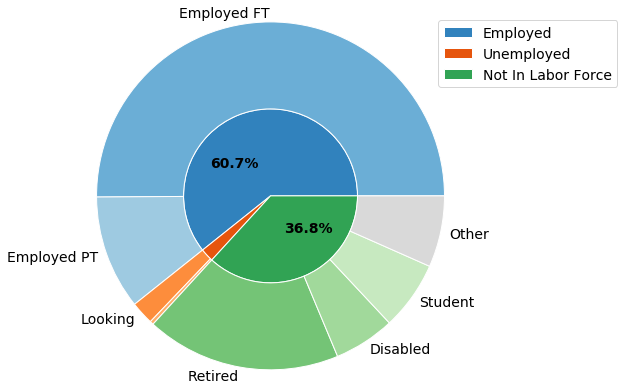

In [326]:
fig, ax = plt.subplots()
ax.axis('equal')
width = 1.0

cm = plt.get_cmap("tab20c")
cout = cm(np.arange(3)*4)
pie, _ = ax.pie([df_perc2018['perc_employed'].values[0],df_perc2018['perc_unemployed'].values[0],df_perc2018['perc_nilf'].values[0]], radius=1,labels=[str(round(df_perc2018['perc_employed'].values[0]*100,1))+'%','',str(round(df_perc2018['perc_nilf'].values[0]*100,1))+'%'],textprops={'fontsize': 14,'weight':'bold'}, labeldistance=0.4,colors=cout)
plt.setp( pie, width=width, edgecolor='white')

cin = cm(np.array([1,2,5,6,9,10,11,28]))
# labels = list(map("".join, zip(list("aabbcc"),map(str, [1,2]*3))))
# pie2, _ = ax.pie([60,60,37,40,29,10], radius=1-width, labels=labels,
#                                       labeldistance=0.7, colors=cin)
pie2, _ = ax.pie([df_perc2018['perc_employed_ft'].values[0],df_perc2018['perc_employed_pt'].values[0],df_perc2018['perc_looking'].values[0],df_perc2018['perc_layoff'].values[0],df_perc2018['perc_retired_nilf'].values[0],df_perc2018['perc_disabled_nilf'].values[0],df_perc2018['perc_student_nilf'].values[0],df_perc2018['perc_nilf'].values[0]-df_perc2018['perc_disabled_nilf'].values[0]-df_perc2018['perc_retired_nilf'].values[0]-df_perc2018['perc_student_nilf'].values[0]], radius=1+width, labels=['Employed FT','Employed PT','Looking','','Retired','Disabled','Student','Other'],labeldistance=1.05, textprops={'fontsize': 14},colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
plt.legend(['Employed','Unemployed','Not In Labor Force'],loc=(1,1),fontsize=14)
# ax.set_title('2018 Breakout of Adult Non-Institutionalized Civilian Population (16+)')

In [327]:
months_dict = {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}
df_urates['Date'] = df_urates['Month'].replace(months_dict)+df_urates['Year'].astype(str)

df_urates = df_urates[(df_urates.Year>1998)&(df_urates.Year<2019)]

df_urates

,Year,Month,Num_employed,Num_unemployed,Num_LF,Num_total,UR,UR_weighted,U6,U6_weighted,Date
0,1999,1,59155,2946,62101,93150,0.047439,0.049205,0.084594,0.086336,JAN1999
0,1999,2,58742,2856,61598,92300,0.046365,0.048238,0.083643,0.085197,FEB1999
0,1999,3,58378,2697,61075,91568,0.044159,0.045674,0.081629,0.084619,MAR1999
0,1999,4,58815,2469,61284,92231,0.040288,0.042393,0.077608,0.080846,APR1999
0,1999,5,59265,2410,61675,92500,0.039076,0.041184,0.077881,0.080931,MAY1999
...,...,...,...,...,...,...,...,...,...,...,...
0,2018,8,58350,2307,60657,98040,0.038034,0.040158,0.074665,0.078059,AUG2018
0,2018,9,59145,2124,61269,99038,0.034667,0.035964,0.071868,0.074830,SEP2018
0,2018,10,59156,2077,61233,98750,0.033920,0.035868,0.070136,0.073310,OCT2018
0,2018,11,58883,2051,60934,98355,0.033659,0.035026,0.071921,0.075073,NOV2018


Text(0.5, 1.0, 'Unemployment Rates 1999-2018')

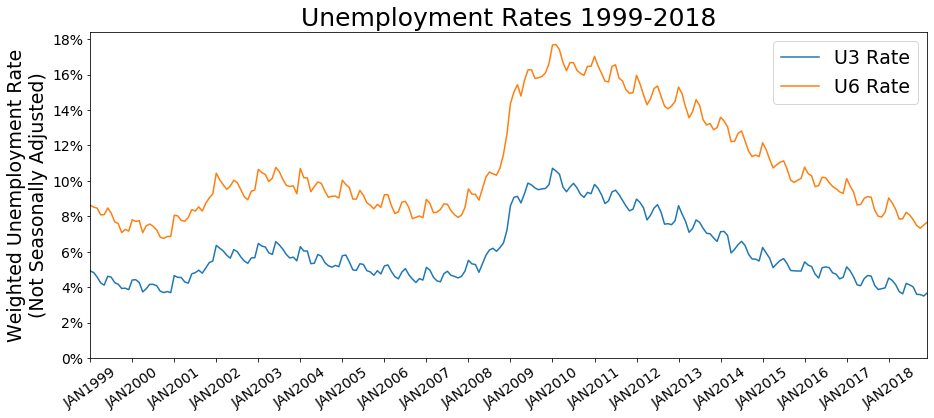

In [328]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_urates['UR_weighted'].values*100)
ax.plot(df_urates['U6_weighted'].values*100)

x = np.arange(0,240,12)
y = np.arange(0,20,2)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2019)],rotation=35)
plt.yticks(y,[str(i)+'%' for i in range(0,20,2)])
ax.margins(x=0)
           
ax.legend(['U3 Rate','U6 Rate'], fontsize=19)

ax.set_ylabel('Weighted Unemployment Rate\n(Not Seasonally Adjusted)', fontsize=19, multialignment='center')
ax.tick_params(labelsize=14)

plt.title('Unemployment Rates 1999-2018', fontsize=25)

Text(0.5, 1.0, 'Unemployment Rates 1999-2018')

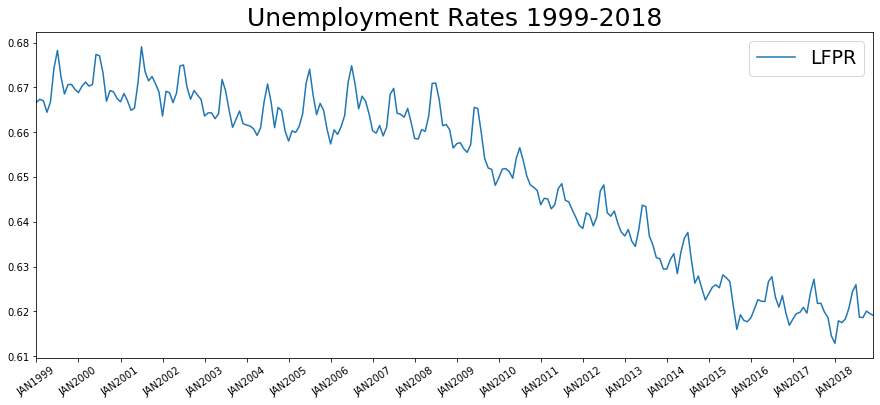

In [329]:
#WEIGHT THIS!!!!!!!!
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_urates['Num_LF'].values/df_urates['Num_total'].values)

x = np.arange(0,240,12)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2019)],rotation=35)
ax.margins(x=0)
           
ax.legend(['LFPR'], fontsize=19)

# ax.set_xlabel('Month and Year', fontsize=19)
# ax.set_ylabel('Weighted Unemployment Rate\n(Not Seasonally Adjusted)', fontsize=19, multialignment='center')
# ax.tick_params(labelsize=14)

plt.title('Unemployment Rates 1999-2018', fontsize=25)

Text(0.5, 1.0, 'Unemployment Rates 1999-2018')

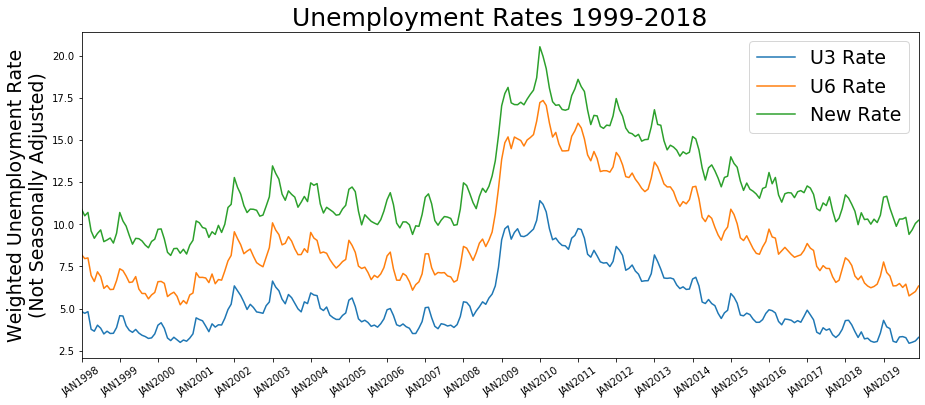

In [343]:
pops = ['white_male','white_female','black_male','black_female','hispanic_male','hispanic_female']
rates = ['urate_weighted','U6_weighted','Self_rate_weighted']
labels = ['U3 Rate','U6 Rate','New Rate']

cols = [[r+'_'+p for p in pops] for r in rates]

fig, ax = plt.subplots(figsize=(15,6))
for i in cols:
    ax.plot(df_urate[i[0]].values*100)
    

ax.legend([labels[0],labels[1],labels[2]], fontsize=19)

x = np.arange(0,264,12)
plt.xticks(x,['JAN'+str(yr) for yr in range(1998,2020)],rotation=35)
ax.margins(x=0)
           
# ax.legend(['LFPR'], fontsize=19)

# ax.set_xlabel('Month and Year', fontsize=19)
ax.set_ylabel('Weighted Unemployment Rate\n(Not Seasonally Adjusted)', fontsize=19, multialignment='center')
# ax.tick_params(labelsize=14)

plt.title('Unemployment Rates 1999-2018', fontsize=25)
